## IMPORTS AND DATA EXPLORATION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [31]:
sns.set_theme(style = 'darkgrid')

In [3]:
data = pd.read_csv("./data/CAR DETAILS FROM CAR DEKHO.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
data.shape

(4340, 8)

In [6]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [8]:
data['make'] = data['name'].apply(lambda x: ' '.join(x.split(' ')[:1]))
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,make
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


## VISUALIZATIONS

### H.BAR - TOP 10 MAKES AND MODELS

In [9]:
make_val = data.make.value_counts()[:10]
df1 = pd.DataFrame()
df1['make'] = make_val.index
df1['count'] = make_val.values
df1

,make,count
0,Maruti,1280
1,Hyundai,821
2,Mahindra,365
3,Tata,361
4,Honda,252
5,Ford,238
6,Toyota,206
7,Chevrolet,188
8,Renault,146
9,Volkswagen,107


In [10]:
fig = px.bar(
    df1,
    x = 'make',
    y = 'count',
    title = 'VALUE COUNTS OF TOP 10 CAR MANUFACTURERS'
)
fig.show()

> We see that Maruti Suzuki is by far the most popular among the cars sold in this period of time, followed by Hyundai and close competition between Mahindra and Tata. This goes on to show that Maruti Cars are greatly resold and have good scope for reselling.

### COUNTPLOT - YEAR WISE COUNT OF PRODUCED CARS

In [11]:
year_cnt = pd.DataFrame()
year_cnt['year'] = data.year.value_counts().index
year_cnt['count'] = data.year.value_counts().values
year_cnt

,year,count
0,2017,466
1,2015,421
2,2012,415
3,2013,386
4,2014,367
5,2018,366
6,2016,357
7,2011,271
8,2010,234
9,2019,195


In [12]:
fig = px.histogram(
    data,
    x = 'year',
    title = "YEAR WISE COUNT OF CARS PRODUCED"
    
)
fig.show()

> Going by the countplot, we see that in this period of time, reselling cars have peaked around the period of 2013 to 2018. There is a sharp decline in 2019 and 2020, posibbly because of the COVID 19 debacle.

### PIE CHART - DEALER TYPE COUNTS

In [13]:
seller_data = pd.DataFrame()
seller_data['type'] = data.seller_type.value_counts().index
seller_data['count'] = data.seller_type.value_counts().values
seller_data

,type,count
0,Individual,3244
1,Dealer,994
2,Trustmark Dealer,102


In [14]:
fig = px.pie(
    seller_data,
    values = 'count',
    names = 'type',
    title = "COUNTS OF SELLER TYPES"
)
fig.show()

> This pie chart shows that most of the resale is happening through individual sellers. Maybe this can be attributed to the rise of apps like CarDekho and Carwale, along with classics like OLX.

### PIE CHART - SHARE OF TRANSMISSION TYPE

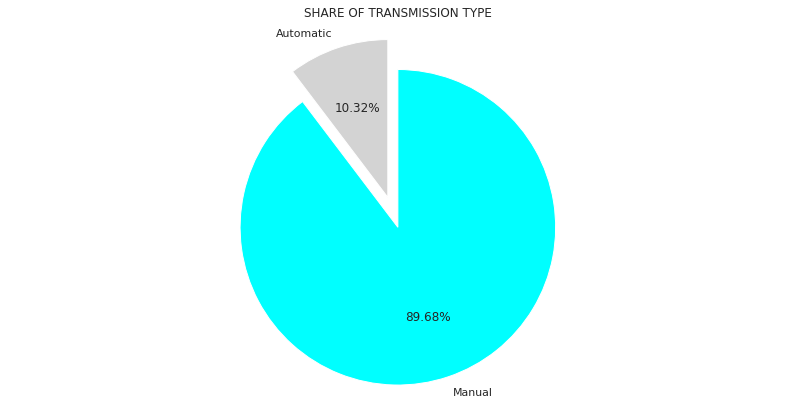

In [46]:
plt.figure(figsize = (14, 7))
labels = ['Automatic', 'Manual']
plt.pie(
    data['transmission'].value_counts().sort_values(),
    labels = labels,
    explode = [0.1,0.1],
    autopct='%1.2f%%',
    colors = ['lightgray','cyan'], 
    startangle = 90
)
plt.title('SHARE OF TRANSMISSION TYPE')
plt.axis('equal')
plt.show()

> This chart is to demonstrate that a huge majority of the resold cars are of manual transmission type. Possibly because automatic cars have better life due to less wear and tear on the working of the transmission.

### VIOLIN PLOT - DISTRIBUTION OF TRANSMISSION TYPE OF CARS BASED ON FUEL TYPE

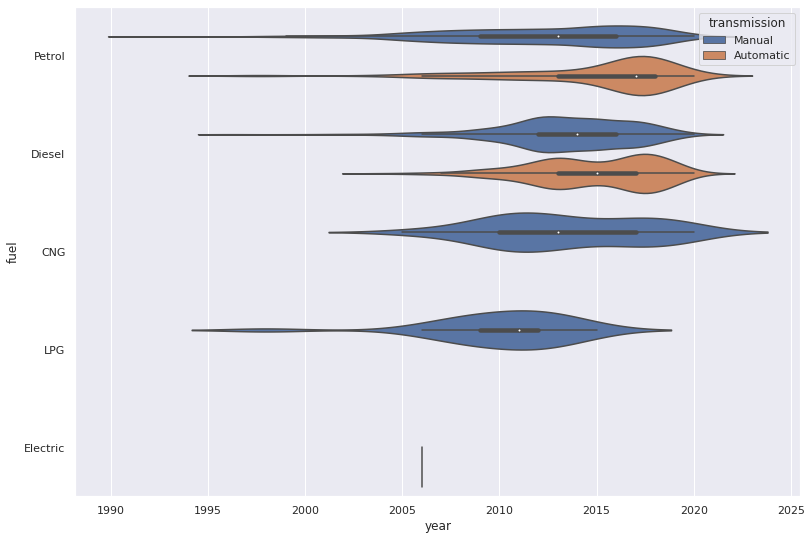

In [49]:
plt.figure(figsize = (13, 9))
sns.violinplot(
    data = data, 
    x = 'year', 
    y = 'fuel',
    hue = 'transmission'
)
plt.show()

> Thought this plot shows a lot of information, one interesting fact is that even though CNG fuel type is lesser known and even lesser posessed, it has the same distribution of Petrol cars sold. 
>
> One more fact is that the general distribution of Diesel cars being resold is smaller than petrol ones, again showing that diesel cars have better life. 

### DISTPLOT - DISTRIBUTION OF DRIVEN KILOMETERS

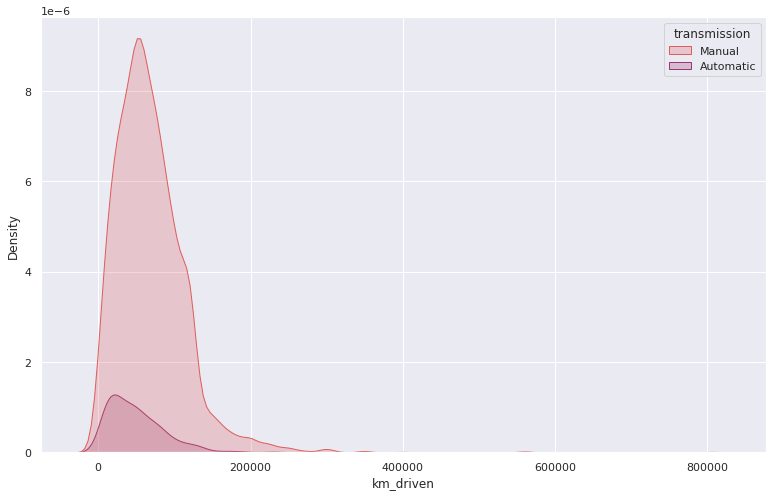

In [42]:
plt.figure(figsize = (13, 8))
sns.kdeplot(
    data = data,
    x = 'km_driven',
    fill = True,
    hue = 'transmission',
    palette = 'flare'
)
plt.show()

> This simple looking plot uncovers one crucial and daily experienced inference : The mean of the kms driven of resold cars lies around the 80 - 120k region. This is hugely due to the fact that most of these are normal consumer cars, and that the tinkering and modification industry in India is very limited and niche, thus resulting in people not holding their cars for long, before moving on.

### HEATMAP - CORRELATION BETWEEN FEATURES

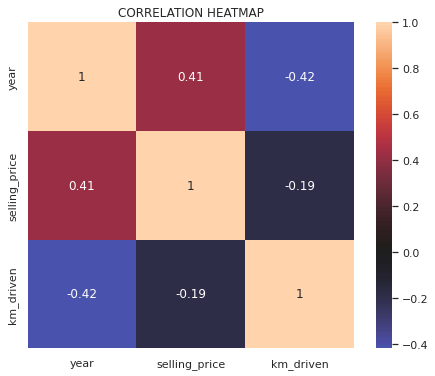

In [63]:
df1 = data[['year', 'selling_price', 'km_driven']]

corr = df1.corr()

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(
    corr,
    center = 0, 
    square = True,
    annot = True
)

plt.title("CORRELATION HEATMAP")
plt.show()


> The main inference from this heatmap is that there is a medium positive correlation between Selling Price and year. This is natural, that the inflation has caused the selling price of cars to increase along the years.

### SCATTERPLOT - RELATIONSHIP BETWEEN SELLING PRICE AND KILOMETERS DRIVEN


In [71]:
plt.figure(figsize = (14, 8))
fig = px.scatter(
    data,
    x = 'selling_price',
    y = 'km_driven',
    title = 'RELATIONSHIP BETWEEN SELLING PRICE AND KMS DRIVEN'
)
fig.show()

<Figure size 1008x576 with 0 Axes>

> This scatterplot demonstrates the common inference: The selling price decreases as the kms driven are increased. But it is not as linear as expected, due to some people selling their cars for lower price even though they are not used much, maybe due to urgent need for cash.